## Part 1: The Gravitational Potential of Earth

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
G = 6.67*10**(-11) # m^3 / kg / s^2
g = 9.81 # m / s^2
m_e = 5.9*10**24 # kg
m_m = 7.3*10**22 # kg
m_command = 5500 # kg
R_e = 6378*10**3 # m
R_m = 1737*10**3 # m
distance_moon = 3.8*10**8 # m
v_ex = 2.4*10**3 # m / s
burn_rate = 1.3*10**4 # kg / s
wet_mass = 2.4*10**6 # kg
dry_mass = 7.5*10**5 # kg

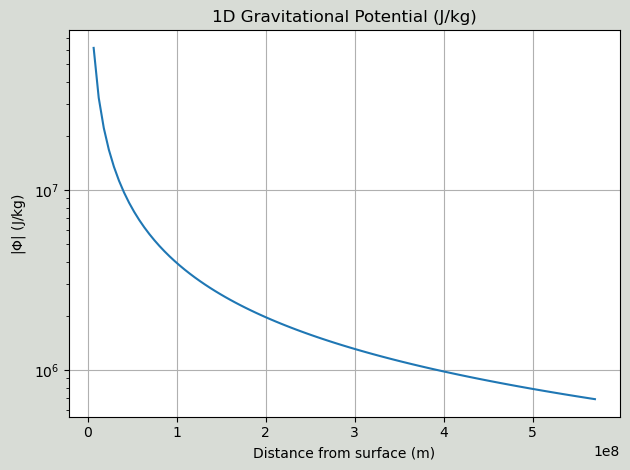

In [3]:

def gpotential(M, x, y, xm, ym):
    if np.isclose((xm-x)**2 + (ym-y)**2, 0):
        return np.nan
    else:
        u = -G*M/(np.sqrt((xm-x)**2 + (ym-y)**2))
        return u

upotential = np.vectorize(gpotential)

x1 = np.linspace(R_e, 1.5*distance_moon, 100)
y1 = 0
xm = 0
ym = 0

fig1, ax1 = plt.subplots()
ax1.plot(x1, np.abs(upotential(m_e, x1, y1, xm, ym)))
ax1.set_yscale('log')
ax1.set_ylabel(r'$|\Phi|$ (J/kg)')
ax1.set_xlabel('Distance from surface (m)')
ax1.set_title('1D Gravitational Potential (J/kg)')
ax1.grid()
fig1.set_facecolor('xkcd:light grey')
fig1.tight_layout()
plt.savefig('1DPotential.png', bbox_inches='tight')


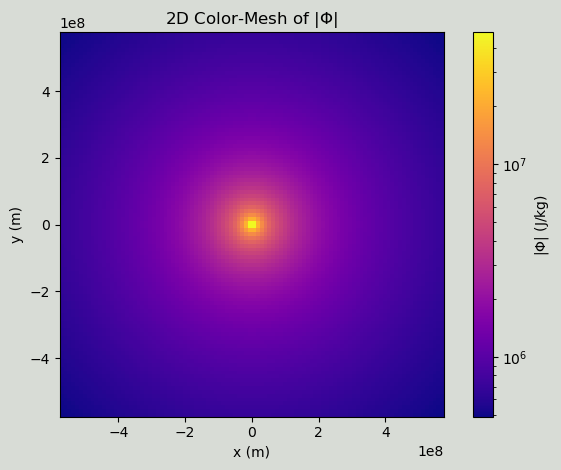

In [4]:
# Question 2:
import matplotlib.cm as cm

x2 = np.linspace(-1.5*distance_moon, 1.5*distance_moon, 100)

x_grid, y_grid = np.meshgrid(x2, x2) # Square meshgrid
z = np.abs(upotential(m_e, x_grid, y_grid, xm, ym))

fig2, ax2 = plt.subplots()
mesh2 = ax2.pcolormesh(x_grid, y_grid, z, norm = 'log', cmap = cm.plasma)
ax2.set_aspect("equal")
ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')
ax2.set_title(r'2D Color-Mesh of $|\Phi|$')
cbar = fig2.colorbar(mesh2, label = r'$|\Phi|$ (J/kg)')
fig2.set_facecolor('xkcd:light grey')
fig2.tight_layout()
plt.savefig('2DMesh_Earth.png', bbox_inches='tight')

## Part 2: The Gravitational Potential of the Earth-Moon System

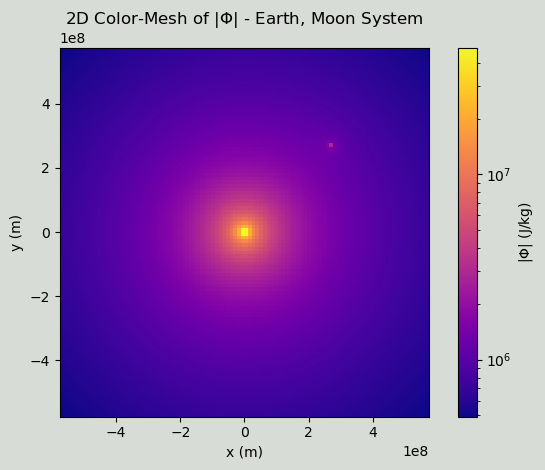

In [5]:
x_e = 0
y_e = 0
x_m = distance_moon/np.sqrt(2)
y_m = distance_moon/np.sqrt(2)

# Same meshgrid limits as last time

# Now, we have an additional mass.
# Total gravitational potential is just the sum of the components

z3 = np.abs(upotential(m_e, x_grid, y_grid, x_e, y_e) + upotential(m_m, x_grid, y_grid, x_m, y_m))

fig3, ax3 = plt.subplots()
mesh3 = ax3.pcolormesh(x_grid, y_grid, z3, norm = 'log', cmap = cm.plasma)
ax3.set_aspect("equal")
ax3.set_xlabel('x (m)')
ax3.set_ylabel('y (m)')
ax3.set_title(r'2D Color-Mesh of $|\Phi|$ - Earth, Moon System')
cbar3 = fig3.colorbar(mesh3, label = r'$|\Phi|$ (J/kg)')
fig3.set_facecolor('xkcd:light grey')
fig3.tight_layout()
plt.savefig('2DMesh_System.png', bbox_inches='tight')

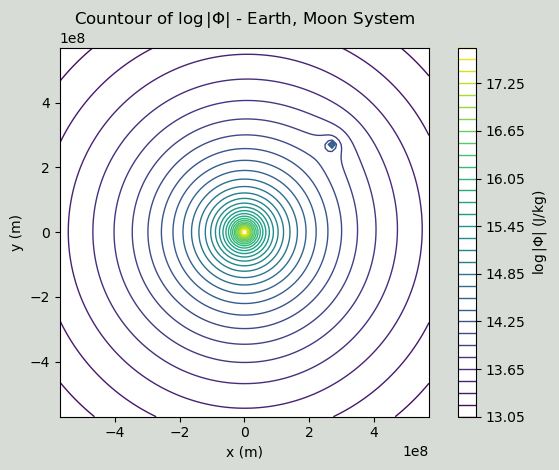

In [6]:
fig4, ax4 = plt.subplots()
mesh4 = ax4.contour(x_grid,y_grid, np.log(z3),levels = 40, linewidths = 1)
cbar4 = fig4.colorbar(mesh4, label = r'$\log{|\Phi|}$ (J/kg)', )
ax4.set_xlabel('x (m)')
ax4.set_ylabel('y (m)')
ax4.set_title(r'Countour of $\log{|\Phi|}$ - Earth, Moon System')
ax4.set_aspect("equal")
fig4.set_facecolor('xkcd:light grey')
fig4.tight_layout()
plt.savefig('ContourLog.png', bbox_inches='tight')

## Part 3: 

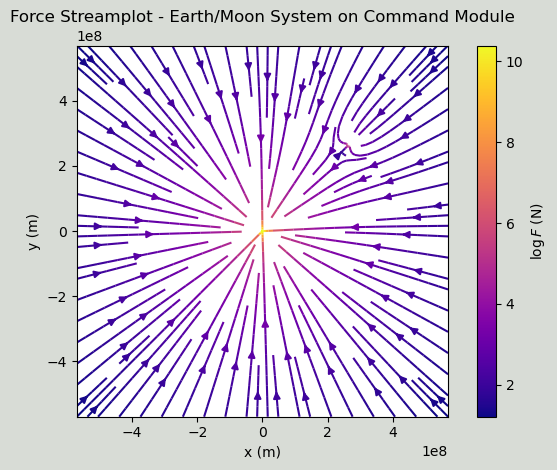

In [7]:
def Fg(m1, m2, m, x1, y1, x2, y2, x, y):
    if np.isclose((y1 - y)**2 + (x1 - x)**2,0):
        return np.nan
    elif np.isclose((y2 - y)**2 + (x2 - x)**2,0):
        return np.nan
    else:
        r_mag1 = np.sqrt((y - y1)**2 + (x - x1)**2)
        r_mag2 = np.sqrt((y - y2)**2 + (x - x2)**2)
        theta1 = np.arctan2((y-y1),(x-x1))
        theta2 = np.arctan2((y-y2),(x-x2))
        F_mag1 = -G*m1*m/r_mag1**2
        F_mag2 = -G*m2*m/r_mag2**2
        Fx = F_mag1*np.cos(theta1) + F_mag2*np.cos(theta2)
        Fy = F_mag1*np.sin(theta1) + F_mag2*np.sin(theta2)
        return Fx, Fy

F_g = np.vectorize(Fg)
m = m_command
Fx, Fy = F_g(m_e, m_m, m, x_e, y_e, x_m, y_m, x_grid, y_grid)

colors = np.log(np.hypot(Fx, Fy))

fig5, ax5 = plt.subplots()
stream = ax5.streamplot(x_grid, y_grid, Fx, Fy, color = colors, cmap = cm.plasma, density = 1.2)
ax5.set_ylabel('y (m)')
ax5.set_xlabel('x (m)')
ax5.set_title('Force Streamplot - Earth/Moon System on Command Module')
cbar = fig5.colorbar(stream.lines, label = r'$\log{F}$ (N)')
fig5.set_facecolor('xkcd:light grey')
ax5.set_aspect("equal")
fig5.tight_layout()
plt.savefig('StreamSystem.png', bbox_inches='tight')

## Part 4: Altitude of the Saturn V Rocket

In [8]:
T = (wet_mass - dry_mass)/burn_rate
print('Burn time:',np.round(T,3), 'seconds')

Burn time: 126.923 seconds


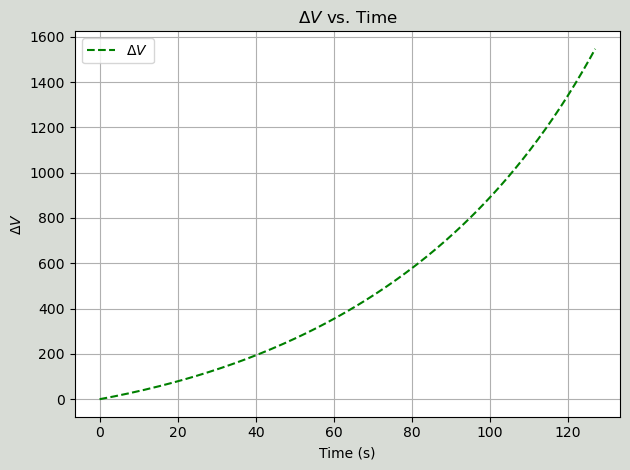

In [9]:
# Delta velocity function
def delta_V(t, v_e = v_ex, m0 = wet_mass, dburn = burn_rate, a = g):
    mass = m0 - dburn*t
    if np.isclose(m0/mass, np.inf):
        return np.nan
    else:
        DV = v_e*np.log(m0/mass) - a*t
        return DV

dV = np.vectorize(delta_V)

Burn_time = np.linspace(0, T, 200)
#Sanity check plotting
fig6, ax6 = plt.subplots()
ax6.plot(Burn_time, dV(Burn_time), ls = '--', color = 'green', label = r'$\Delta V$')
ax6.set_ylabel(r'$\Delta V$')
ax6.set_xlabel('Time (s)')
ax6.set_title(r'$\Delta V$ vs. Time')
fig6.set_facecolor('xkcd:light grey')
ax6.legend()
ax6.grid()
fig6.tight_layout()
plt.savefig('dV.png', bbox_inches='tight')

In [10]:
# Altitude of the Rocket
from scipy.integrate import quad

altitude, altitude_err = quad(dV, 0, T)
print('Altitude:', np.round(altitude,1), 'm')

Altitude: 64546.8 m
